In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path

In [95]:
data = pd.read_csv('../raw_data/data_for_ml.csv',index_col=0)

In [96]:
data.sample(15)

,description,headline,location,company,jobTitle,jobDescription,jobLocation,jobDateRange,jobDuration,company2,...,skill2,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6
UserID,,,,,,,,,,,,,,,,,,,,,
575.0,NaN,Technical Solution Manager at think-cell | PMP...,"Berlin, Berlin, Germany",think-cell software,Technical Solution Manager,- Collaborate with sales and CSM teams to unde...,"Berlin, Germany",Feb 2023 - Present,1 yr 1 mo,DB Schenker,...,Project Management,26.0,Business Process Management,26.0,Marketing,15.0,Sales Management,16.0,Financial Accounting,14.0
198.0,I am a Senior Product Manager who enjoys colla...,Senior Product manager - B2B SaaS at Shiftmove...,"Berlin, Berlin, Germany",avrios international ag,Senior Product Manager,NaN,NaN,Aug 2023 - Present,7 mos,Avrios International AG,...,Product-Led Growth,4.0,Stakeholder-Management,2.0,Product Strategy,3.0,Product Discovery,NaN,Jobs to Be Done (JTBD),NaN
646.0,20+ years of experience in building digital pr...,Product Management Trainer & Consultant | Entr...,Berlin Metropolitan Area,tamer el-hawari,Self Employed,NaN,"Berlin, Germany",Jan 2024 - Present,3 mos,Project A Ventures,...,Project Management,18.0,Product Strategies,14.0,Start-ups,4.0,Agile Project Management,6.0,User Experience,7.0
527.0,I come from a consulting background within the...,Product @ Choco | MBA,"Berlin, Berlin, Germany",choco,Product Manager,Skills: Integration · Automation · Moderating ...,"Berlin, Germany",Mar 2023 - Present,1 yr 1 mo,Choco,...,Integration,51.0,Technical Product Management,21.0,Enterprise,62.0,Automation,2.0,Technical Discussions,62.0
559.0,A product manager with a cross-functional back...,"Product Lead at Adevinta, Motors Vertical",Berlin Metropolitan Area,adevinta,Growth Product Lead,Skills: Team Management · Product Strategy · N...,"Berlin, Germany",Oct 2021 - Present,2 yrs 5 mos,eBay,...,Negotiation,74.0,Product Strategy,42.0,Key Performance Indicators,96.0,Problem Solving,63.0,SEO,33.0
451.0,NaN,Building the world’s most innovative and perso...,"Berlin, Berlin, Germany",opera,Senior Director of Product,NaN,"Berlin, Germany",Jan 2022 - Present,2 yrs 2 mos,The Mentoring Club gUG,...,Product Management,26.0,Team Leadership,21.0,Online Advertising,99.0,Business Development,67.0,Project Management,30.0
334.0,NaN,Associate Product Manager @ Just Eat Takeaway.com,Berlin Metropolitan Area,just eat takeaway.com,Associate Product Manager,🚀 Onboarding in the Apps Platform team (Core f...,"Berlin, Germany · Hybrid",Oct 2021 - Present,2 yrs 6 mos,Just Eat Takeaway.com,...,Product Management,NaN,User Experience (UX),NaN,Problem Solving,NaN,Project Delivery,NaN,Product Road Mapping,NaN
283.0,Hands-on and versatile Senior Product Manager ...,Senior Product Manager @Zalando,"Berlin, Berlin, Germany",zalando,Senior Product Manager,@Zalando Returns Solution (ZRS)\nOn a journey ...,NaN,Mar 2022 - Present,2 yrs,Zalando,...,Data Analysis,NaN,Project Management,NaN,Product Development,NaN,Supply Chain Operations,NaN,B2B Software,2.0
376.0,Product owner bei HUMANOO!,Product Management @ HUMANOO | Former trainee ...,"Berlin, Berlin, Germany",humanoo,Product Owner,I’m a mobile apps Product Owner with in-depth ...,"Berlin, Germany",Jun 2022 - Present,1 yr 9 mos,Orizon,...,Technical Writing,NaN,Research Skills,NaN,Executive Leadership,NaN,Public Speaking,NaN,Application Programming Interfaces (API),NaN


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UserID              475 non-null    float64
 1   description         350 non-null    object 
 2   headline            475 non-null    object 
 3   location            475 non-null    object 
 4   company             474 non-null    object 
 5   jobTitle            473 non-null    object 
 6   jobDescription      321 non-null    object 
 7   jobLocation         418 non-null    object 
 8   jobDateRange        470 non-null    object 
 9   jobDuration         469 non-null    object 
 10  company2            467 non-null    object 
 11  jobTitle2           466 non-null    object 
 12  jobDescription2     388 non-null    object 
 13  jobLocation2        398 non-null    object 
 14  jobDuration2        466 non-null    object 
 15  school              464 non-null    object 
 16  schoolDe

In [75]:
# merge columns to a metadata column
# Specify the columns to merge
data.fillna("", inplace=True)
#columns_to_merge = ['headline','description', 'jobTitle','jobDescription','jobTitle2', 'schoolDegree', 'skill1', 'skill2', 'skill3','skill4', 'skill5', 'skill6']
columns_to_merge = ['headline','description', 'jobTitle','jobDescription','jobTitle2', 'skill1', 'skill2', 'skill3']
# Merge specified columns into one column
data['metadata'] = data[columns_to_merge].apply(lambda row: ' '.join(row), axis=1)

/var/folders/5f/td3vxmq52mgbxcd36rlnh7wc0000gn/T/ipykernel_10495/214941109.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna("", inplace=True)


In [76]:
data.sample(10)

,UserID,description,headline,location,company,jobTitle,jobDescription,jobLocation,jobDateRange,jobDuration,...,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6,metadata
360,593.0,Throughout my career I connected the dots betw...,Communication Expert| Data Person | | Social M...,"Berlin, Berlin, Germany",media partisans gmbh,Media Partisans GmbH - Social Media Manager/ J...,• Managed a 700K-follower YouTube channel in t...,,Jun 2020 - May 2023,3 yrs,...,,Statistical Data Analysis,,Interviewing,2.0,Web Content Writing,,Social Media Writing,43.0,Communication Expert| Data Person | | Social M...
112,579.0,,Associate Product Manager @ Metaloop,"Berlin, Berlin, Germany",metaloop,Associate Product Manager,"First product manager hired after CPO, focusin...",,Aug 2023 - Present,7 mos,...,2.0,User Experience (UX),2.0,Process Improvement,1.0,User Research,2.0,Product Analytics,,Associate Product Manager @ Metaloop Associat...
212,483.0,I'm passionate about building products for imp...,Co-founder & CPO at Klim ⎢Scaling Regenerative...,Berlin Metropolitan Area,klim,Co-founder & Chief Product Officer,🌟 Forbes 30 under 30\n🌟 Veuve Clicquot Bold Fu...,"Berlin, Germany",Sep 2020 - Present,3 yrs 7 mos,...,,,,,,,,,,Co-founder & CPO at Klim ⎢Scaling Regenerative...
248,108.0,"Pioneered the strategic, commercial, and opera...",Sr. Product Manager @ Packt,"Berlin, Berlin, Germany",packt,Senior Product Manager,"I own the strategic, commercial and operationa...","Berlin, Germany",Dec 2022 - Present,1 yr 4 mos,...,,Leadership,,Communication,5.0,Teamwork,,Marketing,9.0,Sr. Product Manager @ Packt Pioneered the stra...
259,638.0,"Hello! I'm Srishti Maitra, a tech enthusiast w...",Product Manager | WHU MBA | ESCP Business Scho...,"Berlin, Berlin, Germany",escp business school,Student Ambassador,• Represented ESCP’s flagship MIM Program on v...,,Sep 2021 - Present,2 yrs 7 mos,...,7.0,C++,6.0,Microsoft SQL Server,1.0,Leadership,4.0,Project Management,5.0,Product Manager | WHU MBA | ESCP Business Scho...
153,176.0,Experienced SaaS Product Manager,Senior Product Manager,"Berlin, Berlin, Germany",ride.,Senior Product Manager,,"Berlin, Germany · Remote",Sep 2023 - Present,6 mos,...,1.0,Programming,17.0,Laboratory,3.0,Physics,26.0,AFM,1.0,Senior Product Manager Experienced SaaS Produc...
326,689.0,"Technical Product Manager, focused and driven ...",Data Product Manager,"Berlin, Berlin, Germany",delivery hero,Senior Data Product Manager,Technical Product Manager for the Global Data ...,"Berlin, Germany",Oct 2022 - Present,1 yr 6 mos,...,12.0,Product Engineering,13.0,Big Data,6.0,Agile,10.0,Product Development,12.0,Data Product Manager Technical Product Manager...
85,115.0,,Geschäftsführer bei The Injera Company GmbH,"Berlin, Berlin, Germany",the injera company gmbh,Geschäftsführer,,,Oct 2021 - Present,2 yrs 5 mos,...,,,,,,,,,,Geschäftsführer bei The Injera Company GmbH G...
44,412.0,As a Senior Recruiter with now 24000+ follower...,"Senior Recruiter in Design, Product & Technolo...","Berlin, Berlin, Germany",mr. recruitment,"Senior Digital Recruiter in UX/UI Design, Prod...","▶️ I help scaling-up Design-, Product-, Engine...","Berlin Area, Germany",Apr 2014 - Present,9 yrs 11 mos,...,1.0,Event Management,,Career Counseling,1.0,Career Development Coaching,1.0,FigJam,,"Senior Recruiter in Design, Product & Technolo..."
147,597.0,,Striving for Innovation,"Berlin, Berlin, Germany",axel springer,Product Owner Cloud & Data,Skills: Amazon Web Services (AWS) · Jira · AWS...,"Berlin, Germany",Nov 2023 - Present,4 mos,...,,Kubernetes,,Containerization,,Docker,,Hybrid Cloud,,Striving for Innovation Product Owner Cloud &...


In [58]:
import re # REGEX
import string 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# [] ---> character set (match any character in the set)
# ^ ---> starting with 
# [^ ] ---> negated set (match any character that is NOT in the set)
# \w ---> special class called "word characters". It is shorthand for [a-zA-Z0-9_]
# + ---> match as many times as possible (greedy quantifier)
# ? ---> match as few characters as possible (lazy quantifier)
# +? ---> match one character at once

def basic_cleaning(sentence):
    # TODO: Apply all cleaning methods used above
    # 1. Removing whitespaces
    sentence = sentence.strip()

    # 2. Lowercasing
    sentence = sentence.lower()

    # 3. Removing numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())

    # remove tags
    sentence = re.sub('<[^<]+>', "", sentence)

    # 4. Removing punctuation
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '')
        
    #5 remove non-alpha characters
    sentence = sentence.replace(r'[^a-zA-Z\s]', '')
    
    return sentence

In [77]:
data['metadata'] = data.metadata.apply(basic_cleaning)

In [78]:
data

,UserID,description,headline,location,company,jobTitle,jobDescription,jobLocation,jobDateRange,jobDuration,...,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6,metadata
0,512.0,Experienced professional with the ability to c...,"General Manager - US Finance, Legal, HR, Accou...","Carrollton, Texas, United States",orbis systems,"General Manager, Orbis International Technolog...",A highly driven professional leading the US op...,"Carrollton, Texas, United States",May 2022 - Present,1 yr 10 mos,...,21.0,Strategic Planning,21.0,Forecasting,21.0,Organizational Development,21.0,Business Strategy,21.0,general manager us finance legal hr accountin...
1,652.0,"I am a Product Owner at World Simplified UG, a...",Tech product support intern at Holidu,"Berlin, Berlin, Germany",holidu,Tech product support intern,,"Munich, Bavaria, Germany · Hybrid",Oct 2023 - Present,5 mos,...,,Team Leadership,,Cross-functional Team Leadership,1.0,Project Planning,21.0,Business Development,,tech product support intern at holidu i am a p...
2,618.0,Designer & Problem Solver | CS Student | Aimin...,Making Interfaces Sexier - UI/UX/Dev,"Berlin, Berlin, Germany",a.t.e.m. management gmbh,Web Designer,Skills: Web Design · Cascading Style Sheets (C...,"Berlin, Germany",Aug 2022 - Present,1 yr 7 mos,...,,JavaScript,2.0,Cascading Style Sheets (CSS),2.0,Front-End Development,1.0,Wireframing,1.0,making interfaces sexier uiuxdev designer pr...
3,96.0,,Product & Growth,"Berlin, Berlin, Germany",clink,Chief Experience Officer,,"Berlin, Germany",Sep 2023 - Present,6 mos,...,40.0,Cross-functional Team Leadership,3.0,Business Development,33.0,Mobile Applications,10.0,Mobile Technology,35.0,product growth chief experience officer chi...
4,194.0,As a product marketing manager at the JetBrain...,Product marketing manager at JetBrains | Mentor,"Berlin, Berlin, Germany",jetbrains,Product Marketing Manager,,"Berlin, Germany",Oct 2021 - Present,2 yrs 5 mos,...,8.0,Marketing Communications,8.0,Customer Insight,13.0,Market Analysis,12.0,Marketing Research,11.0,product marketing manager at jetbrains mentor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,229.0,As a Senior Product Manager with over 12+ year...,Product Manager @ KAYAK,"Berlin, Berlin, Germany",kayak,Product Manager,,"Berlin, Germany · On-site",Nov 2023 - Present,5 mos,...,1.0,Customer Onboarding,1.0,Mentoring,1.0,Product Development,1.0,Analytical Skills,,product manager kayak as a senior product man...
471,461.0,A lady with a previous marketing background an...,Junior Product Designer✨| UX/UI | Figma | Rese...,"Berlin, Berlin, Germany",velents,Junior Product Designer,Velents AI is a hiring platform that will help...,"Berlin, Germany · Remote",May 2023 - Present,11 mos,...,,Prototyping,,User Research,,User Experience Design (UED),,Design Systems,21.0,junior product designer✨ uxui figma research...
472,10.0,"A passionate Product Leader Focused on People,...",Product Leader & Mentor • Lead Product Manager...,"Berlin, Berlin, Germany",spryker,Lead Product Manager,Skills: Product Management · Team Leadership ·...,"Berlin, Germany · Remote",Aug 2022 - Present,1 yr 8 mos,...,2.0,Problem Solving,41.0,Team Management,,Technical Understanding,31.0,Product Road Mapping,3.0,product leader mentor • lead product manager ...
473,249.0,"Product Management, Data & Technology enthusia...",Product @HelloFresh,"Berlin, Berlin, Germany",hellofresh,Director of Product,- Driving product alignment and prioritization...,,Jul 2022 - Present,1 yr 9 mos,...,,Data Visualization,,System Design,,Executive Presentation,,Agile Methodologies,,product hellofresh product management data te...


In [38]:
from nltk import word_tokenize

stop_words = set(stopwords.words('english')) 

# Create function
def remove_stopwords (text):
    tokenized = word_tokenize(text)
    without_stopwords = [word for word in tokenized if not word in stop_words]
    return without_stopwords


def lemma(text):
    lemmatizer = WordNetLemmatizer() # Instantiate lemmatizer
    lemmatized = [lemmatizer.lemmatize(word) for word in text] # Lemmatize
    lemmatized_string = " ".join(lemmatized)
    return lemmatized_string


In [79]:
data['metadata'] = data.metadata.apply(remove_stopwords)

data[['metadata']]

,metadata
0,"[general, manager, us, finance, legal, hr, acc..."
1,"[tech, product, support, intern, holidu, produ..."
2,"[making, interfaces, sexier, uiuxdev, designer..."
3,"[product, growth, chief, experience, officer, ..."
4,"[product, marketing, manager, jetbrains, mento..."
...,...
470,"[product, manager, kayak, senior, product, man..."
471,"[junior, product, designer✨, uxui, figma, rese..."
472,"[product, leader, mentor, •, lead, product, ma..."
473,"[product, hellofresh, product, management, dat..."


In [80]:
data['metadata'] = data.metadata.apply(lemma)
data[['metadata']]

,metadata
0,general manager u finance legal hr accounting ...
1,tech product support intern holidu product own...
2,making interface sexier uiuxdev designer probl...
3,product growth chief experience officer chief ...
4,product marketing manager jetbrains mentor pro...
...,...
470,product manager kayak senior product manager y...
471,junior product designer✨ uxui figma research e...
472,product leader mentor • lead product manager s...
473,product hellofresh product management data tec...


In [81]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(data['metadata'])
count_df = pd.DataFrame(count_matrix.toarray(), index=data.index.tolist())
count_df.head()

,0,1,2,3,4,5,6,7,8,9,...,6539,6540,6541,6542,6543,6544,6545,6546,6547,6548
0,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
count_df

,0,1,2,3,4,5,6,7,8,9,...,6539,6540,6541,6542,6543,6544,6545,6546,6547,6548
0,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.decomposition import TruncatedSVD

In [82]:
# Apply SVD
svd = TruncatedSVD(n_components=80)
latent_df = svd.fit_transform(count_df)


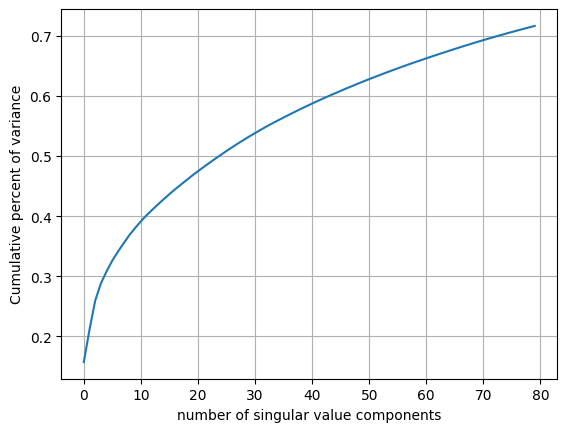

In [83]:
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [22]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /Users/yulka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yulka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yulka/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/yulka/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [87]:
# Apply SVD
svd = TruncatedSVD(n_components=15)
latent_df = svd.fit_transform(count_df)

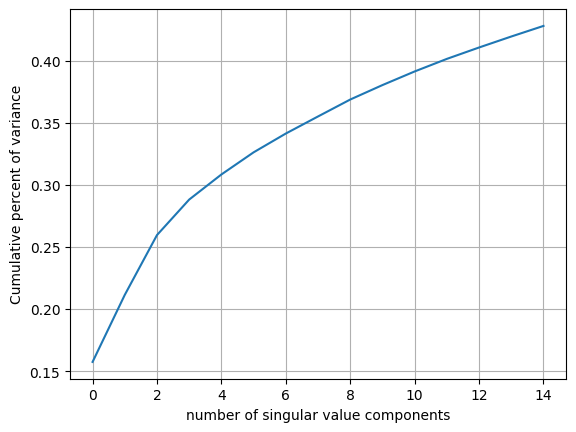

In [88]:
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [89]:
latent_df.shape

(475, 15)

In [91]:
svd.get_feature_names_out()

array(['truncatedsvd0', 'truncatedsvd1', 'truncatedsvd2', 'truncatedsvd3',
       'truncatedsvd4', 'truncatedsvd5', 'truncatedsvd6', 'truncatedsvd7',
       'truncatedsvd8', 'truncatedsvd9', 'truncatedsvd10',
       'truncatedsvd11', 'truncatedsvd12', 'truncatedsvd13',
       'truncatedsvd14'], dtype=object)

In [92]:
latent_df

array([[ 3.51720275,  0.39472738, -0.30919282, ..., -1.60641127,
         0.43062395,  0.41894216],
       [16.2568108 , -1.31068046,  0.5413881 , ...,  1.74816622,
         1.14798306, -0.72580876],
       [ 2.50396462,  3.72410897, -2.58294957, ...,  1.97105079,
        -1.22808146, -0.2479322 ],
       ...,
       [18.16520445, -2.16375372,  1.29335582, ...,  0.25909164,
        -0.63742015,  1.52844435],
       [13.84809934, -2.45737451,  1.12841007, ..., -1.24570365,
        -0.30975186,  0.61277296],
       [23.68151022, -3.62225951,  1.08247883, ..., -4.60128835,
        -3.05494791,  6.1505744 ]])

In [93]:
pd.DataFrame(latent_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.517203,0.394727,-0.309193,5.139791,-2.606494,-1.278552,2.308028,1.029442,0.019636,0.910785,1.331393,0.158118,-1.606411,0.430624,0.418942
1,16.256811,-1.310680,0.541388,-0.819744,-1.024792,-0.729316,1.821699,-0.631333,1.064389,1.026422,-1.184136,0.429927,1.748166,1.147983,-0.725809
2,2.503965,3.724109,-2.582950,1.581911,-2.361002,2.594216,-0.961354,0.309019,1.103144,-1.174870,0.783138,-0.730085,1.971051,-1.228081,-0.247932
3,2.266676,-0.059742,-0.083976,-0.215851,-0.118922,0.512734,0.022125,0.270700,-0.721479,-0.661116,-0.189747,0.152039,-0.359582,-0.001157,-0.446650
4,9.627313,-0.617538,-0.053235,0.773042,-0.947852,1.894533,-4.203584,3.530013,-4.334911,1.052748,-0.838854,1.309639,3.473372,0.313153,0.037168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,17.165390,-2.662925,1.111340,-2.964897,1.305927,0.179172,-0.013526,-0.472887,-0.893721,1.152674,5.041872,1.081000,1.839043,-1.161138,-3.512662
471,3.966792,1.816258,-1.195367,-0.430806,-0.335187,1.385830,-0.237672,0.952428,0.022043,-2.058787,0.240288,1.226902,1.568806,-1.102387,-0.537023
472,18.165204,-2.163754,1.293356,-1.276871,-2.016906,-0.560381,2.439156,0.615700,1.100449,-1.349946,0.138057,0.259719,0.259092,-0.637420,1.528444
473,13.848099,-2.457375,1.128410,-1.178453,2.571225,-0.504068,1.077900,1.922013,1.627858,0.186144,-0.334888,1.317644,-1.245704,-0.309752,0.612773


In [97]:
COLUMN_NAMES_RAW = [ 'headline','description', 'jobTitle' ,'jobDescription','jobDuration', 'jobDateRange', 'jobTitle2', 'jobDuration2', 'schoolDateRange', 'skill1', 'skill2', 'skill3']

In [98]:
data


,description,headline,location,company,jobTitle,jobDescription,jobLocation,jobDateRange,jobDuration,company2,...,skill2,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6
UserID,,,,,,,,,,,,,,,,,,,,,
512.0,Experienced professional with the ability to c...,"General Manager - US Finance, Legal, HR, Accou...","Carrollton, Texas, United States",orbis systems,"General Manager, Orbis International Technolog...",A highly driven professional leading the US op...,"Carrollton, Texas, United States",May 2022 - Present,1 yr 10 mos,Texas Instruments,...,Management,21.0,Strategic Planning,21.0,Forecasting,21.0,Organizational Development,21.0,Business Strategy,21.0
652.0,"I am a Product Owner at World Simplified UG, a...",Tech product support intern at Holidu,"Berlin, Berlin, Germany",holidu,Tech product support intern,NaN,"Munich, Bavaria, Germany · Hybrid",Oct 2023 - Present,5 mos,World Simplified UG,...,Product Strategies,NaN,Team Leadership,NaN,Cross-functional Team Leadership,1.0,Project Planning,21.0,Business Development,NaN
618.0,Designer & Problem Solver | CS Student | Aimin...,Making Interfaces Sexier - UI/UX/Dev,"Berlin, Berlin, Germany",a.t.e.m. management gmbh,Web Designer,Skills: Web Design · Cascading Style Sheets (C...,"Berlin, Germany",Aug 2022 - Present,1 yr 7 mos,Freelance,...,Java,NaN,JavaScript,2.0,Cascading Style Sheets (CSS),2.0,Front-End Development,1.0,Wireframing,1.0
96.0,NaN,Product & Growth,"Berlin, Berlin, Germany",clink,Chief Experience Officer,NaN,"Berlin, Germany",Sep 2023 - Present,6 mos,OptioPay Group (now Clink),...,Start-ups,40.0,Cross-functional Team Leadership,3.0,Business Development,33.0,Mobile Applications,10.0,Mobile Technology,35.0
194.0,As a product marketing manager at the JetBrain...,Product marketing manager at JetBrains | Mentor,"Berlin, Berlin, Germany",jetbrains,Product Marketing Manager,NaN,"Berlin, Germany",Oct 2021 - Present,2 yrs 5 mos,Product Marketing Alliance,...,Performance marketing,8.0,Marketing Communications,8.0,Customer Insight,13.0,Market Analysis,12.0,Marketing Research,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229.0,As a Senior Product Manager with over 12+ year...,Product Manager @ KAYAK,"Berlin, Berlin, Germany",kayak,Product Manager,NaN,"Berlin, Germany · On-site",Nov 2023 - Present,5 mos,Sastaticket.pk,...,Customer Engagement,1.0,Customer Onboarding,1.0,Mentoring,1.0,Product Development,1.0,Analytical Skills,NaN
461.0,A lady with a previous marketing background an...,Junior Product Designer✨| UX/UI | Figma | Rese...,"Berlin, Berlin, Germany",velents,Junior Product Designer,Velents AI is a hiring platform that will help...,"Berlin, Germany · Remote",May 2023 - Present,11 mos,Brainnest,...,Mobile Design,NaN,Prototyping,NaN,User Research,NaN,User Experience Design (UED),NaN,Design Systems,21.0
10.0,"A passionate Product Leader Focused on People,...",Product Leader & Mentor • Lead Product Manager...,"Berlin, Berlin, Germany",spryker,Lead Product Manager,Skills: Product Management · Team Leadership ·...,"Berlin, Germany · Remote",Aug 2022 - Present,1 yr 8 mos,Spryker,...,Software as a Service (SaaS),2.0,Problem Solving,41.0,Team Management,NaN,Technical Understanding,31.0,Product Road Mapping,3.0


In [101]:
predict = data[COLUMN_NAMES_RAW].sample(1)

In [102]:
predict


,headline,description,jobTitle,jobDescription,jobDuration,jobDateRange,jobTitle2,jobDuration2,schoolDateRange,skill1,skill2,skill3
UserID,,,,,,,,,,,,
332.0,"Product Leader, Sustainability enthusiast",Bridging the world of technology and business ...,Head of Product,Spearhead product development and strategy for...,1 yr,Aug 2022 - Jul 2023,Product Lead,8 mos,Sep 2023 - Nov 2023,Management Consulting,Competitive Landscape,Stakeholder Management


In [103]:
predict.to_csv('../raw_data/predict.csv',index = False)

In [104]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Remove special characters, punctuation, and non-alphanumeric characters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemma_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # Join tokens back into text
    processed_text = " ".join(lemma_tokens)
    
    return processed_text

# Example usage
text = "𝗞𝗲𝘆 𝗿𝗲𝘀𝗽𝗼𝗻𝘀𝗮𝗯𝗶𝗹𝗶𝘁𝗶𝗲𝘀\n•"
processed_text = preprocess_text(text)
print(processed_text)


In [105]:
text

'𝗞𝗲𝘆 𝗿𝗲𝘀𝗽𝗼𝗻𝘀𝗮𝗯𝗶𝗹𝗶𝘁𝗶𝗲𝘀\n•'

In [107]:
text = BeautifulSoup(text, "html.parser").get_text()
text

'𝗞𝗲𝘆 𝗿𝗲𝘀𝗽𝗼𝗻𝘀𝗮𝗯𝗶𝗹𝗶𝘁𝗶𝗲𝘀\n•'

In [108]:
text = re.sub(r"[^a-zA-Z0-9]", " ", text)
text

'                      '